In [1]:
import pandas as pd

In [2]:
DDoS=pd.read_csv('/content/dataset_sdn.csv')

In [3]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [4]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [5]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [6]:
import numpy as np
from sklearn.cluster import KMeans
print(DDoS.describe())

                  dt         switch  ...       tot_kbps          label
count  104345.000000  104345.000000  ...  104345.000000  104345.000000
mean    17927.514169       4.214260  ...    2007.578742       0.390857
std     11977.642655       1.956327  ...    3136.803677       0.487945
min      2488.000000       1.000000  ...       0.000000       0.000000
25%      7098.000000       3.000000  ...       0.000000       0.000000
50%     11905.000000       4.000000  ...       4.000000       0.000000
75%     29952.000000       5.000000  ...    3838.000000       1.000000
max     42935.000000      10.000000  ...   20580.000000       1.000000

[8 rows x 20 columns]


In [7]:
kmeans = KMeans(n_clusters=2)

In [8]:
X= DDoS[['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]

In [9]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(2)
#Transform the data
df = pca.fit_transform(X)
df.shape

(104345, 2)

In [12]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[1 1 1 ... 1 1 1]


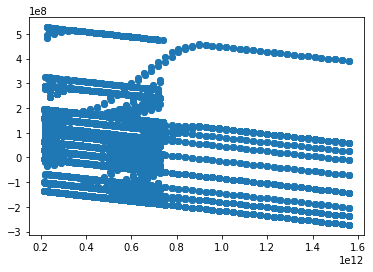

In [13]:
#plotting the individual cluster(Normal network flow)
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

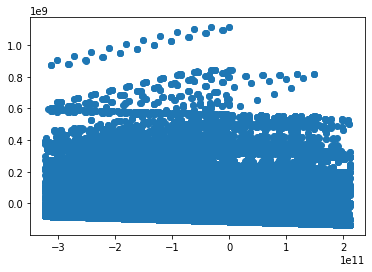

In [14]:
#plotting the individual cluster(DDoS attack)
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label1 = df[label == 1]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

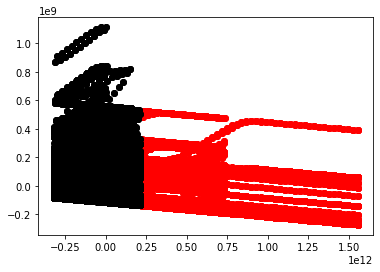

In [15]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
filtered_label1 = df[label == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

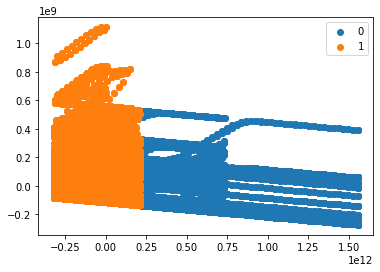

In [16]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

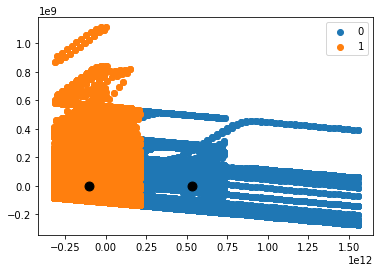

In [17]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(DDoS.label, label)

0.510153816665868

In [20]:
from sklearn import metrics
labels_true=DDoS.label
print("Silhouette Coefficient: %0.3f"
  % metrics.silhouette_score(X, label))

Silhouette Coefficient: 0.706


In [21]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, label))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, label))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, label))

Homogeneity: 0.046
Completeness: 0.070
V-measure: 0.056
